### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.basemap import Basemap

%matplotlib inline

### Load data into a dataframe

In [2]:
costco = pd.read_csv('costcos-geocoded.csv')
ppg = pd.read_csv('ppg2008.csv')

In [3]:
costco.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [75]:
ppg.head()

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


In [4]:
features = ppg.drop(ppg.columns[0], axis=1)
features = features.drop(columns=['G'], axis=1)
features = features.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

### Heat Map

In [5]:
#features = ppg[['FTA', 'FTP']]
corr = features.corr()

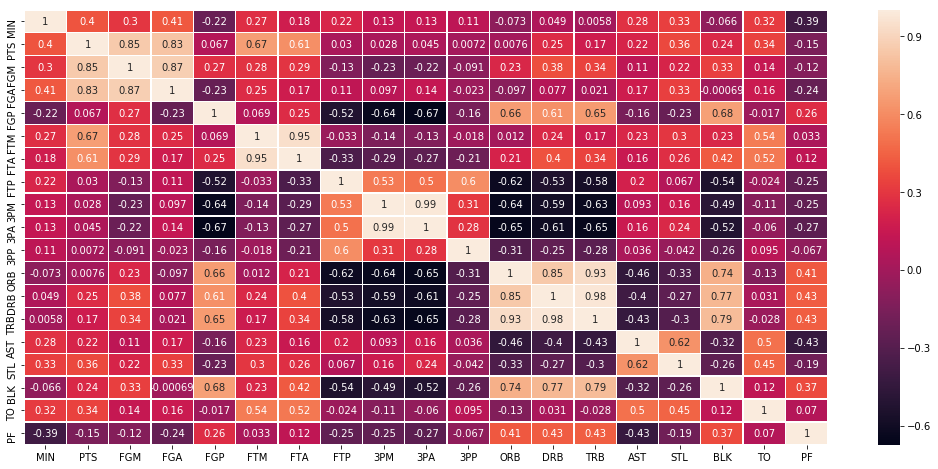

In [6]:
# plot a heatmap for features' correlations
plt.figure(figsize=(18,8))
sns.heatmap(corr, linewidth=0.3, annot=True)
plt.show()

### Spatial Chart - Basemap

In [82]:
lat = costco['Latitude'].values
lon = costco['Longitude'].values

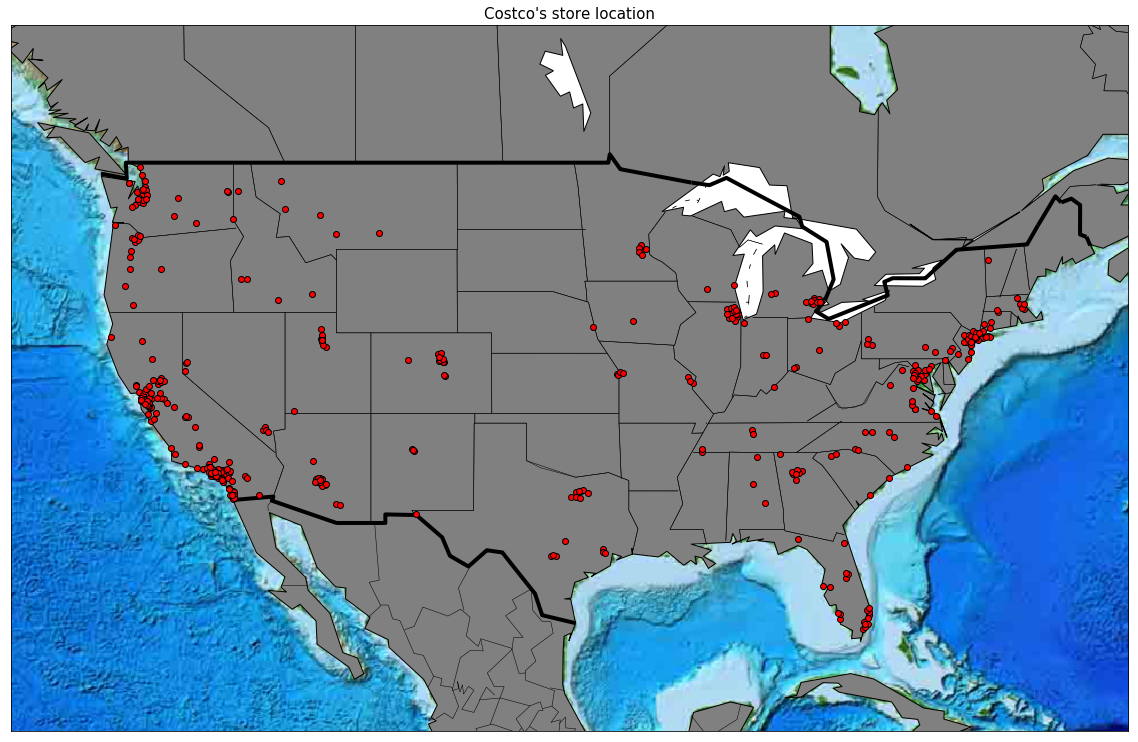

In [74]:
# plot a spatial map for costco's store location
plt.figure(figsize=(24,13))
m = Basemap(projection='mill', llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-65, urcrnrlat=55 , resolution= 'c')
m.drawcoastlines()
m.drawcountries(color='black', linewidth=4)
m.drawstates()
m.fillcontinents(color='gray')
m.scatter(lon,lat, latlon=True, c='red', alpha=1, edgecolor='k', linewidth=1, zorder=2)
m.etopo()

plt.title("Costco's store location", fontsize=15)
plt.show()

### Contour Chart

In [108]:
# load data
c = sns.load_dataset('iris')

In [109]:
x = c.sepal_width
y = c.sepal_length

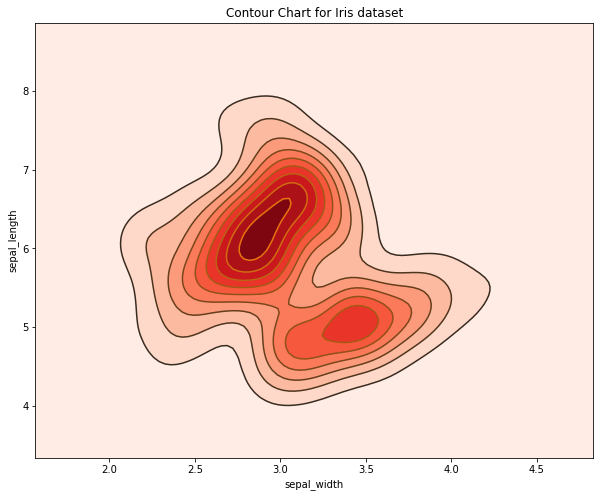

In [114]:
plt.figure(figsize=(10,8))
sns.kdeplot(x, y, cmap='Reds', shade=True)
sns.kdeplot(x, y)
plt.title('Contour Chart for Iris dataset')
plt.show()

In [115]:
# select x y
x = costco['Longitude'].values
y = costco['Latitude'].values

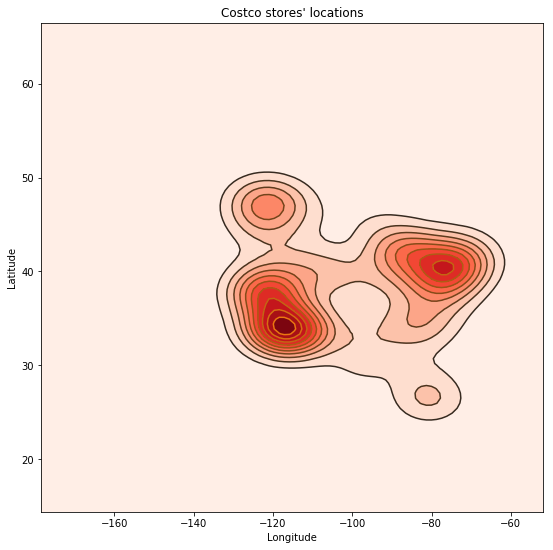

In [120]:
# plot contour chart
plt.figure(figsize=(9,9))
sns.kdeplot(x, y, cmap='Reds', shade=True)
sns.kdeplot(x, y)
plt.title("Costco stores' locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()